In [127]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Read in Data

In [135]:
# Load the dataframe from the csv file
file_name = "results/pred04_240325220507.csv"
df = pd.read_csv(file_name)
df[:5]
# df.shape
df_orig = df.copy() 

## Check distribution of Convpaint among the dataset

Convpaint

Text(0, 0.5, 'Accuracy')

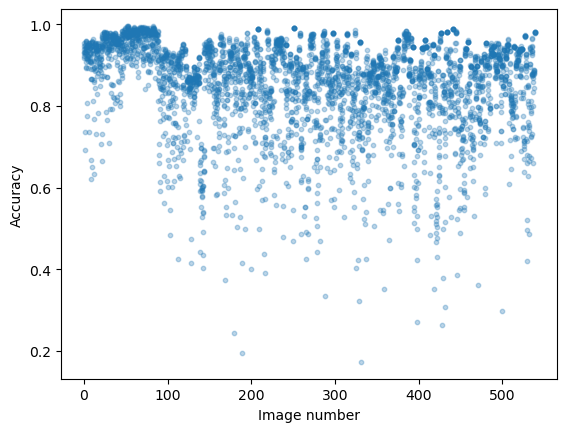

In [134]:
df_conv = df[(df['prediction type'] == 'convpaint')]# & (df['scribbles bin'] == 1)]
# plt.figure(figsize=(5, 3), dpi=300)
plt.scatter(df_conv['img_num'], df_conv['accuracy'], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel('Accuracy')

Add column with and plot difference between Convpaint and Ilastik accuracies

In [133]:
df_2 = df.copy()

# Add ilastik accuracy on the same row as convpaint accuracy as a new column ("acc. ilastik")
for scr in df_2['scribbles']:
    acc_il = df_2.loc[(df_2['scribbles'] == scr) & (df_2['prediction type'] == "ilastik"), "accuracy"].values[0]
    df_2.loc[(df_2['scribbles'] == scr) & (df_2['prediction type'] == "convpaint"), "acc. ilastik"] = acc_il

# Rename the "accuracy" column to "acc. convpaint"
df_2.rename(columns={"accuracy": "acc. convpaint"}, inplace=True)
# Add difference between convpaint and ilastik accuracy in a new column ("acc. diff")
df_2["acc. diff"] = df_2["acc. convpaint"] - df_2["acc. ilastik"]
# Move the columns
df_2 = df_2[["img_num", "scribbles mode", "scribbles bin", "suffix", "class_1_pix_gt", "class_2_pix_gt", "pix_labelled", "class_1_pix_labelled", "class_2_pix_labelled", "pix_in_img", "perc. labelled", "acc. convpaint", "acc. ilastik", "acc. diff", "image", "ground truth", "scribbles"]]
# Remove rows with NaN values (former rows with ilastik accuracy...)
df_2 = df_2.dropna()


Text(0, 0.5, 'Accuracy')

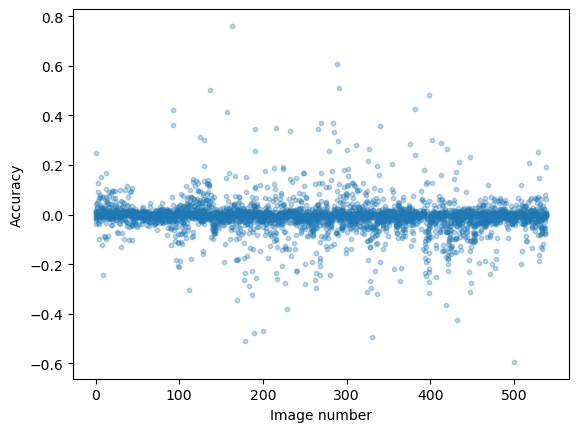

In [5]:
plt.scatter(x = df_2['img_num'], y = df_2['acc. diff'], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel('Accuracy')

## Compare convpaint to ilastik (accuracies)

Check if there is a correlation between pixels labelled (in one or the other class, or the minimum/maximum among classes) - mostly makes sense to check within bins...

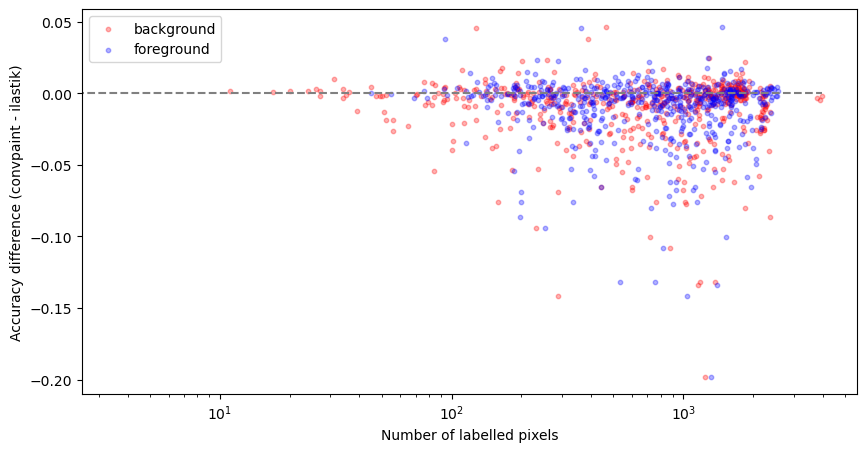

In [20]:
df_bin = df_2[df_2["scribbles bin"] == 1]
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df_bin["class_1_pix_labelled"], df_bin["acc. diff"], alpha=0.3, s=10, c="red", label="background")
plt.scatter(df_bin["class_2_pix_labelled"], df_bin["acc. diff"], alpha=0.3, s=10, c = "blue", label="foreground")
plt.xlabel("Number of labelled pixels")
plt.xscale("log")
plt.hlines(0, 0, np.max([np.max(df_bin["class_1_pix_labelled"]), np.max(df_bin["class_1_pix_labelled"])]), colors='grey', linestyles='dashed')
plt.ylabel("Accuracy difference (convpaint - ilastik)")
plt.legend()

Text(0, 0.5, 'Accuracy difference (convpaint - ilastik)')

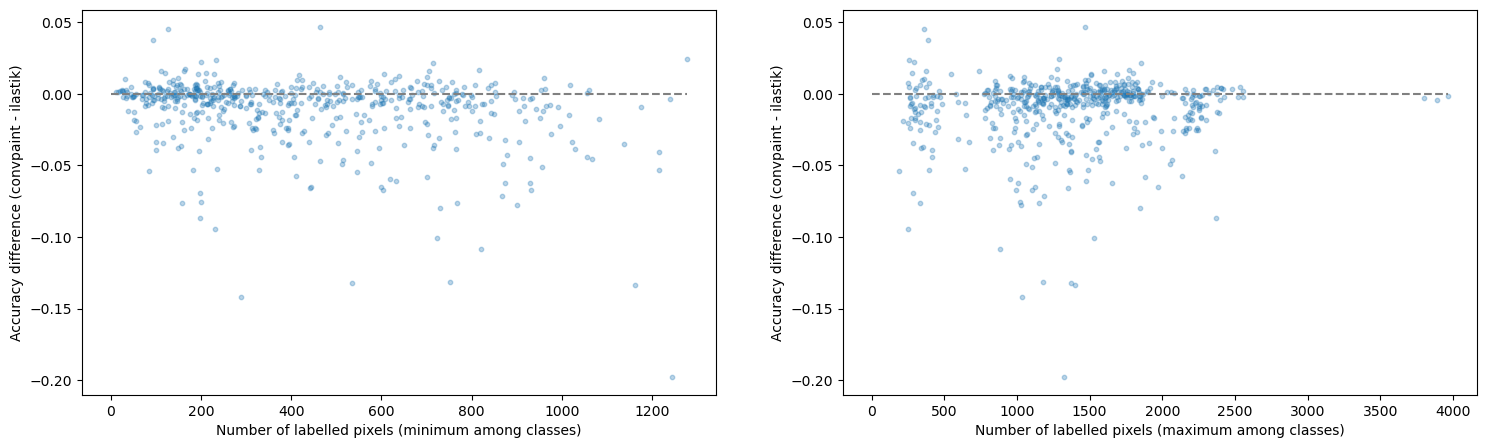

In [23]:
df_bin.loc[:,'min_pix_labelled'] = df_bin[['class_1_pix_labelled', 'class_2_pix_labelled']].min(axis=1)#.astype(int)
df_bin.loc[:,'max_pix_labelled'] = df_bin[['class_1_pix_labelled', 'class_2_pix_labelled']].max(axis=1)#.astype(int)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), dpi=100)
ax1.scatter(x = df_bin['min_pix_labelled'], y = df_bin['acc. diff'], alpha=0.3, s=10)
ax1.set_xlabel("Number of labelled pixels (minimum among classes)")
# ax1.set_xscale("log")
ax1.hlines(0, 0, np.max(df_bin['min_pix_labelled']), colors='grey', linestyles='dashed')
ax1.set_ylabel("Accuracy difference (convpaint - ilastik)")
ax2.scatter(x = df_bin['max_pix_labelled'], y = df_bin['acc. diff'], alpha=0.3, s=10)
ax2.set_xlabel("Number of labelled pixels (maximum among classes)")
# ax2.set_xscale("log")
ax2.hlines(0, 0, np.max(df_bin['max_pix_labelled']), colors='grey', linestyles='dashed')
ax2.set_ylabel("Accuracy difference (convpaint - ilastik)")

Check if there is a correlation with the resolution (number pixels) of the image

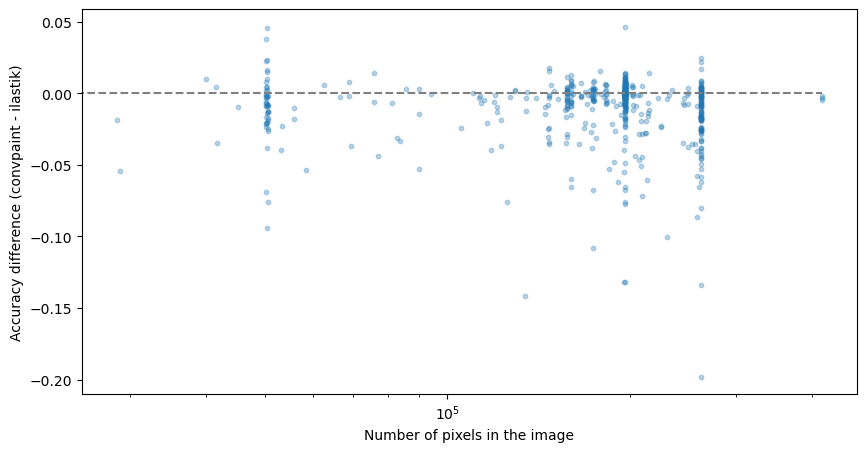

In [24]:
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df_bin["pix_in_img"], df_bin["acc. diff"], alpha=0.3, s=10)
plt.xlabel("Number of pixels in the image")
plt.ylabel("Accuracy difference (convpaint - ilastik)")
plt.hlines(0, 0, np.max(df_bin["pix_in_img"]), colors='grey', linestyles='dashed')
plt.xscale("log")

Check in which cases the difference is the highest

In [25]:
# df_2[df_2['acc. convpaint'] < 0.6].sort_values(by="acc. diff", ascending=True)['image'].shape
df_2[df_2['scribbles bin'] > 0].sort_values(by="acc. diff", ascending=True)[0:10]

,img_num,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,acc. convpaint,acc. ilastik,acc. diff,image,ground truth,scribbles
7000,500,all,0.010,a,5240,45385,4,1,3,50625,0.007901,0.297580,0.891773,-0.594193,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2506,179,all,0.010,a,60365,22200,8,6,2,82565,0.009689,0.243699,0.754194,-0.510495,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
4634,331,all,0.010,a,97221,62779,15,9,6,160000,0.009375,0.172887,0.668394,-0.495506,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2646,189,all,0.010,a,29724,26079,4,2,2,55803,0.007168,0.195491,0.672079,-0.476587,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2802,200,all,0.025,a,224957,37187,49,40,9,262144,0.018692,0.400940,0.872135,-0.471195,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
6050,432,all,0.025,a,34062,16285,9,6,3,50347,0.017876,0.306771,0.731642,-0.424871,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
3206,229,all,0.010,a,73880,83816,12,6,6,157696,0.007610,0.556140,0.937475,-0.381335,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
5866,419,all,0.010,a,136084,60524,17,11,6,196608,0.008647,0.352692,0.716888,-0.364197,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2366,169,all,0.010,a,35188,58892,6,3,3,94080,0.006378,0.374022,0.716890,-0.342868,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2620,187,all,0.025,a,18651,31628,9,3,6,50279,0.017900,0.526681,0.851170,-0.324489,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...


## Compare bins

In [137]:
df_3 = df_2.copy()

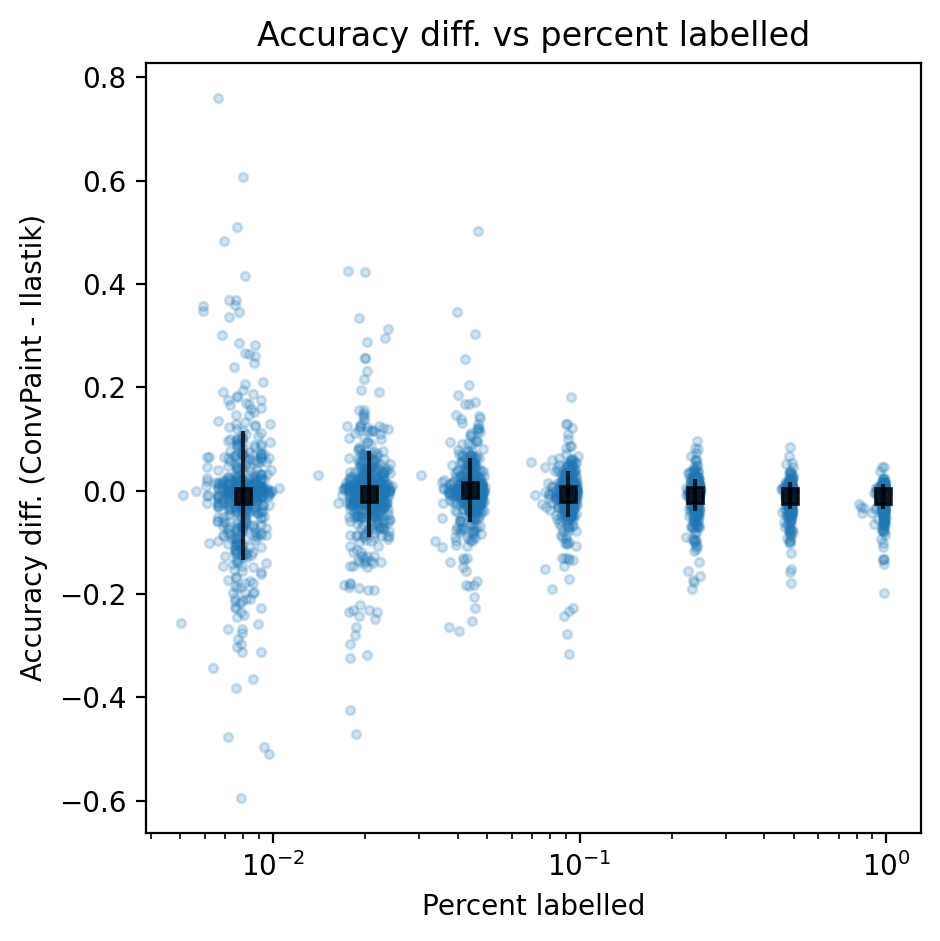

In [138]:
# Plot the data in matplotlib scatter plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)
# # set dpi
fig.set_dpi(200)

# scatter_ax = ax[0]
# sns.scatterplot(x="acc. convpaint", y="acc. ilastik", hue="scribbles bin", data=df_3, palette="viridis", s=30, alpha=0.8, ax=scatter_ax, legend=False, marker='.')
# # scatter_ax.scatter(df_3['acc. convpaint'], df_3['acc. ilastik'], c=df_3['scribbles bin'], cmap='viridis', s=20, alpha=0.7)
# scatter_ax.plot([0, 1], [0, 1], transform=scatter_ax.transAxes, c='black', alpha=0.5)
# scatter_ax.set_xlabel("Accuracy ConvPaint")
# scatter_ax.set_ylabel("Accuracy Ilastik")
# scatter_ax.set_title("Accuracy ConvPaint vs Accuracy Ilastik")

diff_ax = ax
diff_ax.scatter(df_3['perc. labelled'], df_3['acc. diff'], alpha=0.2, s=10)
df_grouped = df_3.groupby('scribbles bin').agg({'acc. diff': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
diff_ax.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['acc. diff']['mean'], yerr=df_grouped['acc. diff']['std'], fmt='s', c='black', alpha=0.8)
diff_ax.set_xscale('log')
diff_ax.set_xlabel('Percent labelled')
diff_ax.set_ylabel('Accuracy diff. (ConvPaint - Ilastik)')
diff_ax.set_title(f'Accuracy diff. vs percent labelled')
plt.show()

## Preprocess for plotting

In [139]:
# Filter out some bins
# df = df[df['scribbles bin'] != 0.01]
# df = df[df['scribbles bin'] != 1]
# df = df[df['class_1_pix_labelled'] >= 5]
# df = df[df['class_2_pix_labelled'] >= 5]
# Change the values of the prediction types to be more readable
# df['prediction type'] = df['prediction type'].apply(lambda x: "convpaint" if x == "convpaintCh1" else "classic filters")


# Create two filtered dataframes
df['prediction type'] = df['prediction type'].apply(lambda x: "classic filters" if x == "ilastik" else x)
df_convpaint = df[df['prediction type'] == 'convpaint']
df_ilastik = df[df['prediction type'] == 'classic filters']
df[:5]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,accuracy,image,ground truth,scribbles,prediction
0,0,convpaint,all,0.010,a,101577,94519,18,9,9,196096,0.009179,0.917306,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
1,0,classic filters,all,0.010,a,101577,94519,18,9,9,196096,0.009179,0.929356,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
2,0,convpaint,all,0.025,a,101577,94519,40,22,18,196096,0.020398,0.921467,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
3,0,classic filters,all,0.025,a,101577,94519,40,22,18,196096,0.020398,0.906704,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...
4,0,convpaint,all,0.050,a,101577,94519,79,38,41,196096,0.040286,0.930753,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...,/home/rschwob/cellpose_scribbles_test/cellpose...


## Plot only one prediction type

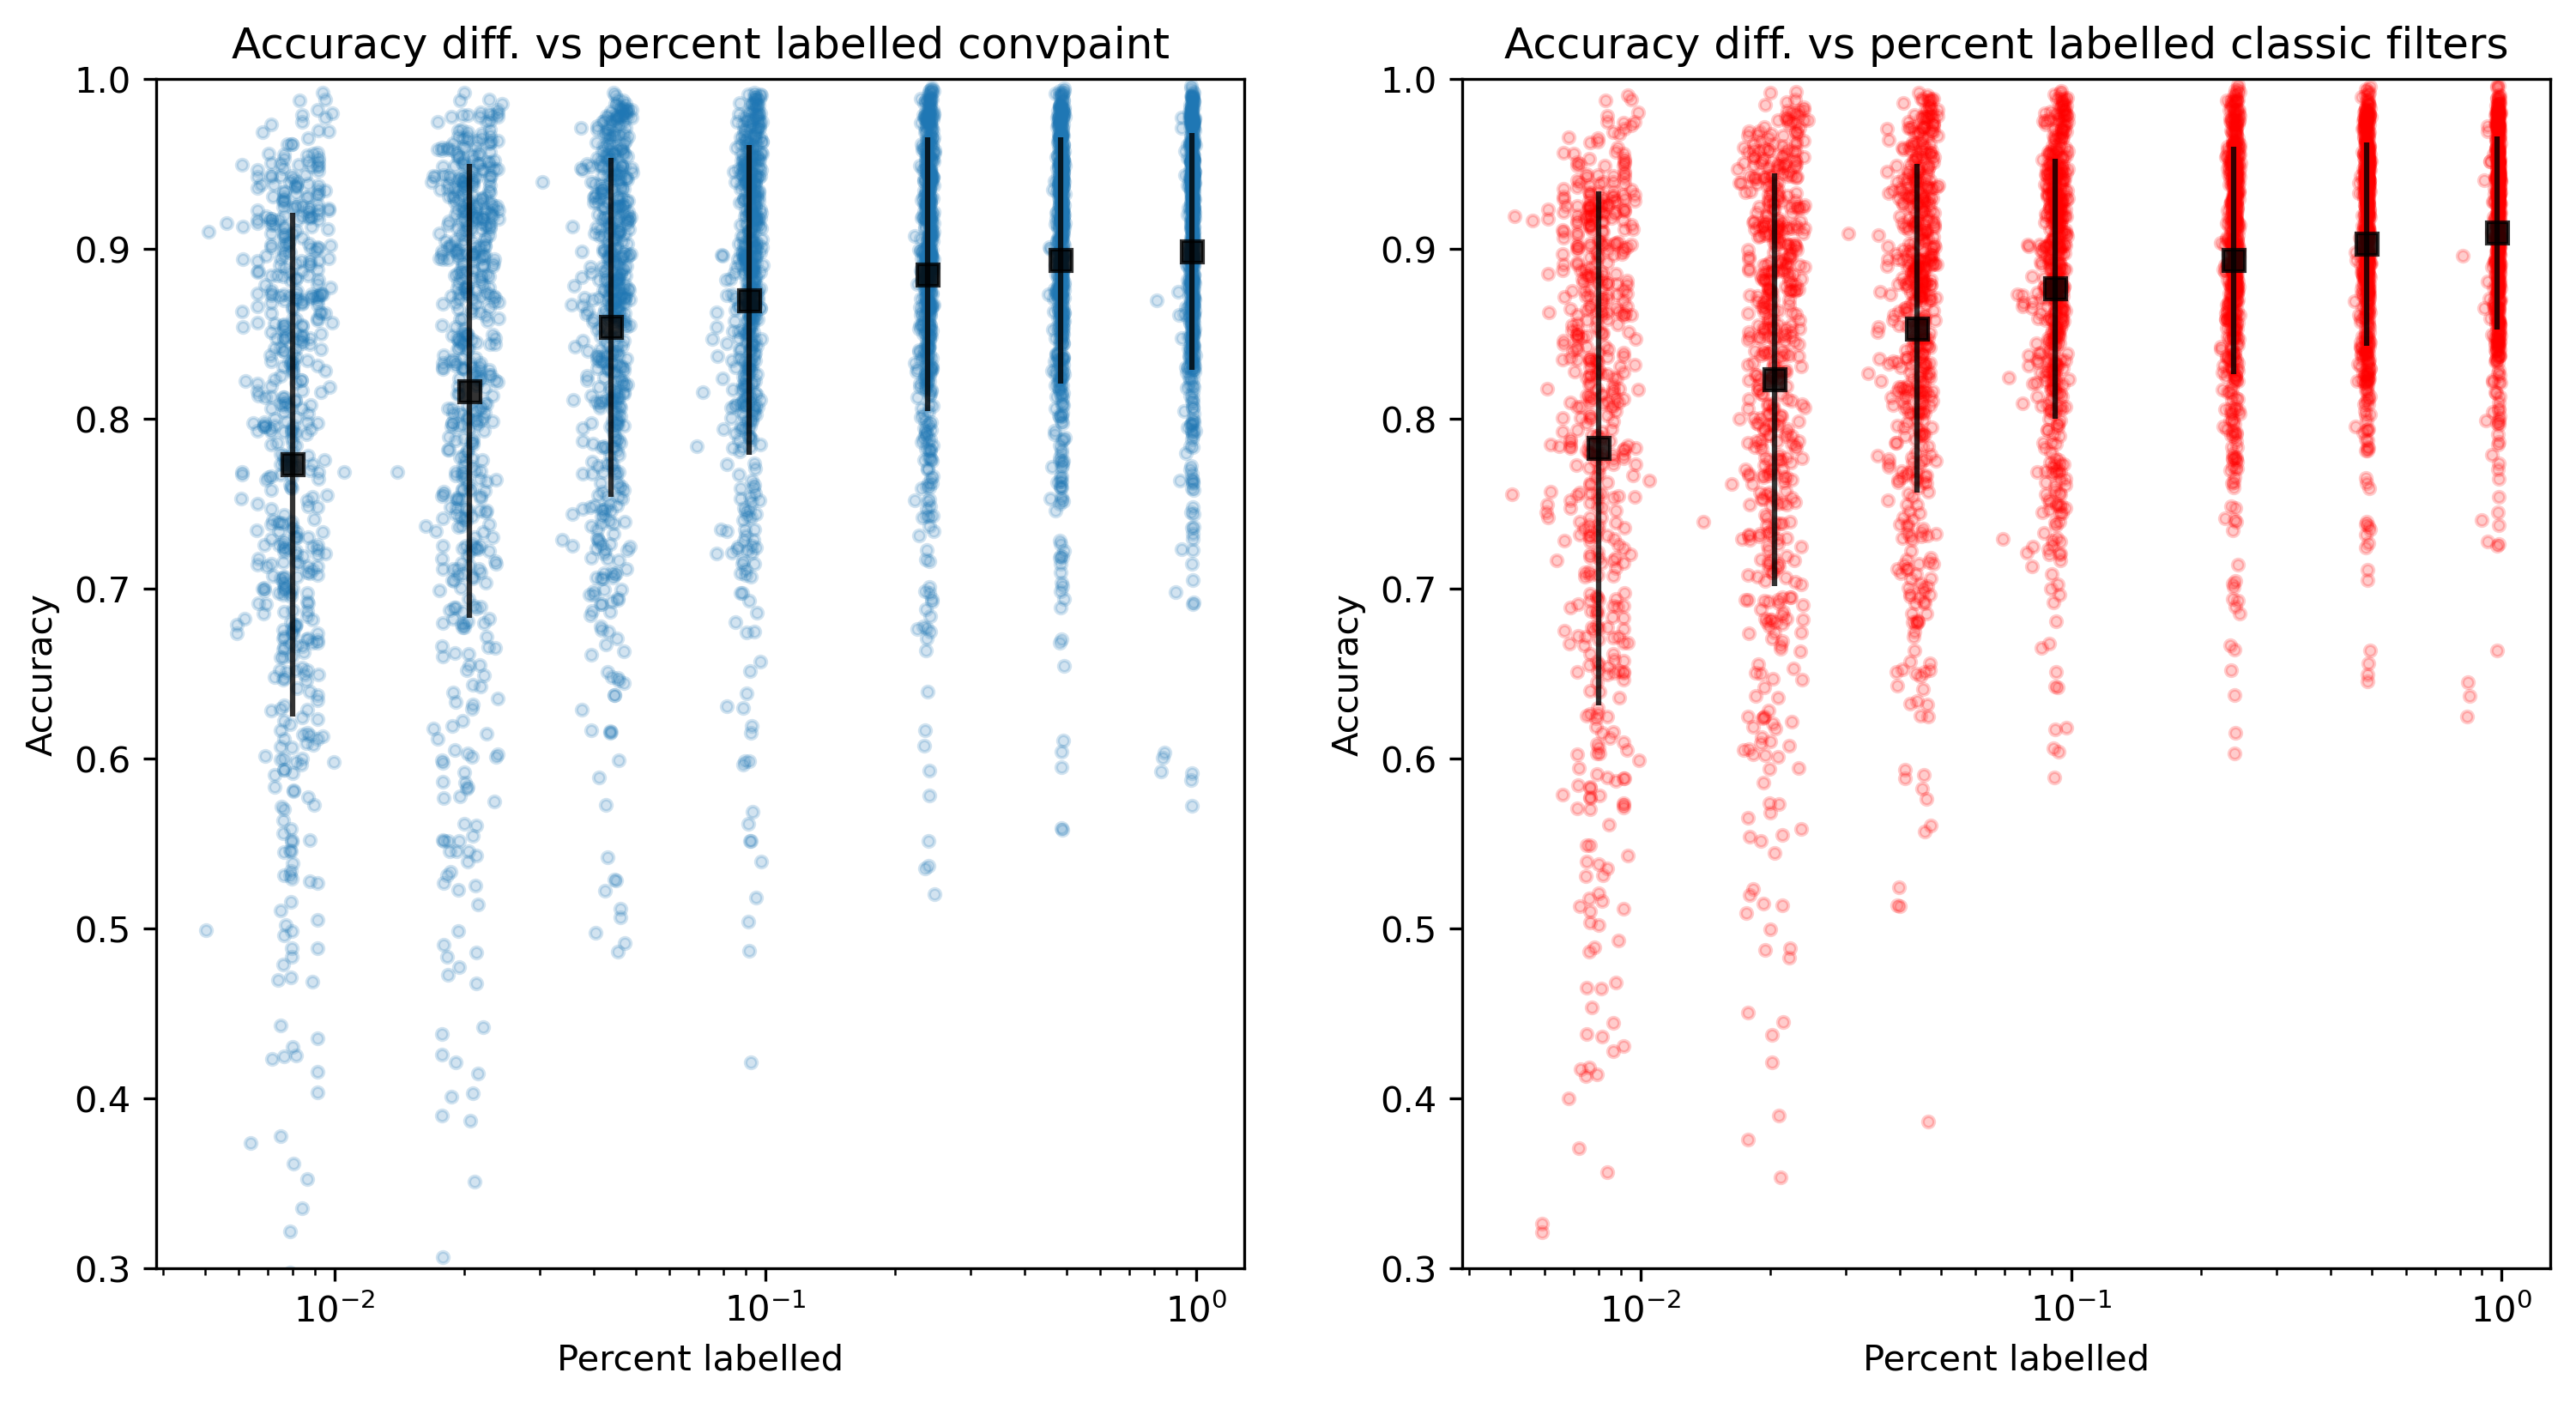

In [140]:
def plot_accuracy_vs_perc_labelled(df, pred_to_show="convpaint", plt_ax=None, **kwargs):
    if plt_ax is None:
        plt_ax = plt.subplots(1, 1)[1]
    # Plot accuracy vs percent labelled
    df_filtered = df[df['prediction type'] == pred_to_show]

    # Scatterplot
    plt_ax.scatter(df_filtered['perc. labelled'], df_filtered['accuracy'], alpha=0.2, s=10, **kwargs)

    # Grouped plot
    df_grouped = df_filtered.groupby('scribbles bin').agg({'accuracy': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
    plt_ax.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='black', alpha=0.8)
    plt_ax.set_xscale('log')
    plt_ax.set_ylim(0.3, 1)
    # plt_ax.set_xticks([0.05, 0.1, 1])
    plt_ax.set_xlabel('Percent labelled')
    plt_ax.set_ylabel('Accuracy')
    plt_ax.set_title(f'Accuracy diff. vs percent labelled {pred_to_show}')

fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 6)
fig.set_dpi(300)
plot_accuracy_vs_perc_labelled(df, 'convpaint', plt_ax=ax[0])
plot_accuracy_vs_perc_labelled(df, 'classic filters', plt_ax=ax[1], c='red')
# plt.savefig('results/accuracy_vs_perc_labelled.pdf', dpi=300)
plt.show()


## Plot both prediction types together (convpaint vs. ilastik)

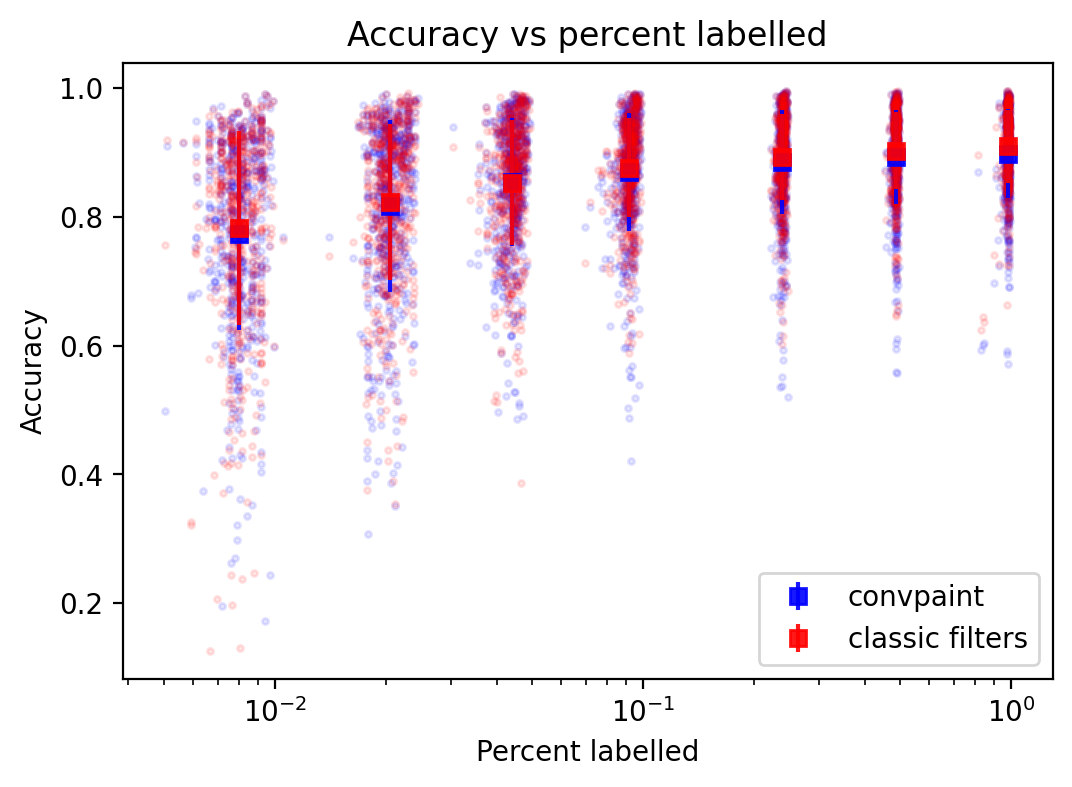

In [141]:
# Plot accuracy vs percent labelled
plt.figure(figsize=(6,4),dpi=200)

# ADD CONVPAINT PLOT
# Scatterplot
plt.scatter(df_convpaint['perc. labelled'], df_convpaint['accuracy'], alpha=0.1, s=5, c='blue')
# Grouped plot
df_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='blue', alpha=0.9, label='convpaint')
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='blue', alpha=0.9)

# ADD ILASTIK PLOT
# Scatterplot
plt.scatter(df_ilastik['perc. labelled'], df_ilastik['accuracy'], alpha=0.1, s=5, c='red')
# Grouped plot
df_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='red', alpha=0.9, label='classic filters')
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='red', alpha=0.9)

# ADJUST PARAMETERS
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.legend()
plt.show()

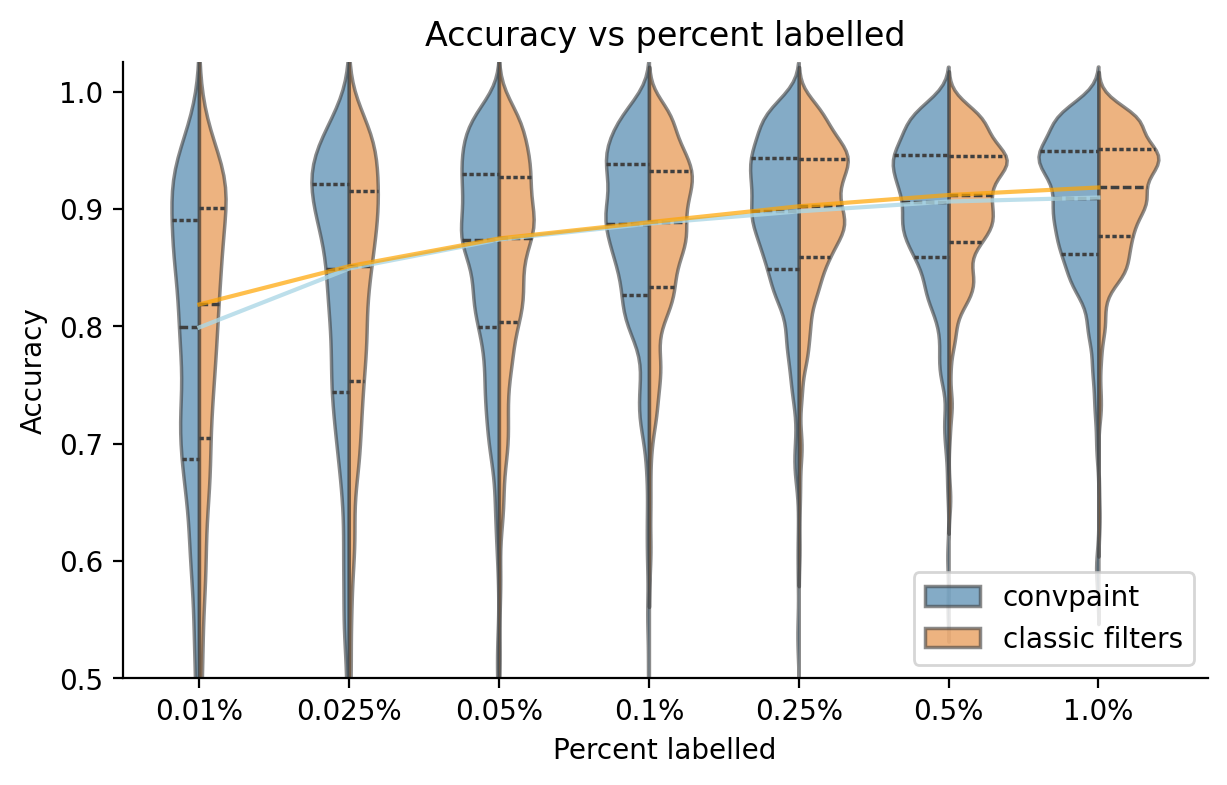

In [142]:
# Add a [0,0] point to the grouped dataframes manually
# df_convpaint_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_convpaint_grouped], ignore_index=True)
# df_ilastik_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_ilastik_grouped], ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'convpaint'}, ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'classic filters'}, ignore_index=True)

plt.figure(figsize=(7, 4), dpi=200)

# Plot violin plot with seaborn split the violin between convpaint and ilastik
# Create the violin plot
ax = sns.violinplot(x='scribbles bin', y='accuracy', data=df, hue='prediction type', split=True, alpha=0.6, inner="quart", bw_adjust=0.65)

# Create line plot
# Group the bins
df_convpaint_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
df_ilastik_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
# Plot the means of each bin and connect them with a line
x_positions = ax.get_xticks()
plt.plot(x_positions, df_convpaint_grouped['accuracy'], color='lightblue', alpha=0.8)
plt.plot(x_positions, df_ilastik_grouped['accuracy'], color='orange', alpha=0.7)

# Set some parameters
x_labels = [f"{x}%" for x in df_convpaint_grouped['scribbles bin']]
plt.ylim(0.5, 1.025)
# remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x_positions, x_labels)
plt.legend(loc='lower right')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')

# Show or save the plot
plt.show()
# plt.savefig("convpaint-vs-ilastik_acc-vs-lab.svg", format='svg')

## Compare VGG16 models

In [129]:
file_name001 = "results/pred05_run02_240328182009.csv"
file_name010 = "results/pred05_run03_240403104745.csv"
file_name100 = "results/pred06_240403221657.csv"
df001 = pd.read_csv(file_name001)
df010 = pd.read_csv(file_name010)
df100 = pd.read_csv(file_name100)
# Extract layers and scalings
for df in [df001, df010, df100]:
    df['layers'] = df['prediction type'].str.extract(r'l-(\d+-?\d*)')
    df['scalings'] = df['prediction type'].str.extract(r's-(\d+-?\d*-?\d*-?\d*)')
    # df[:5]

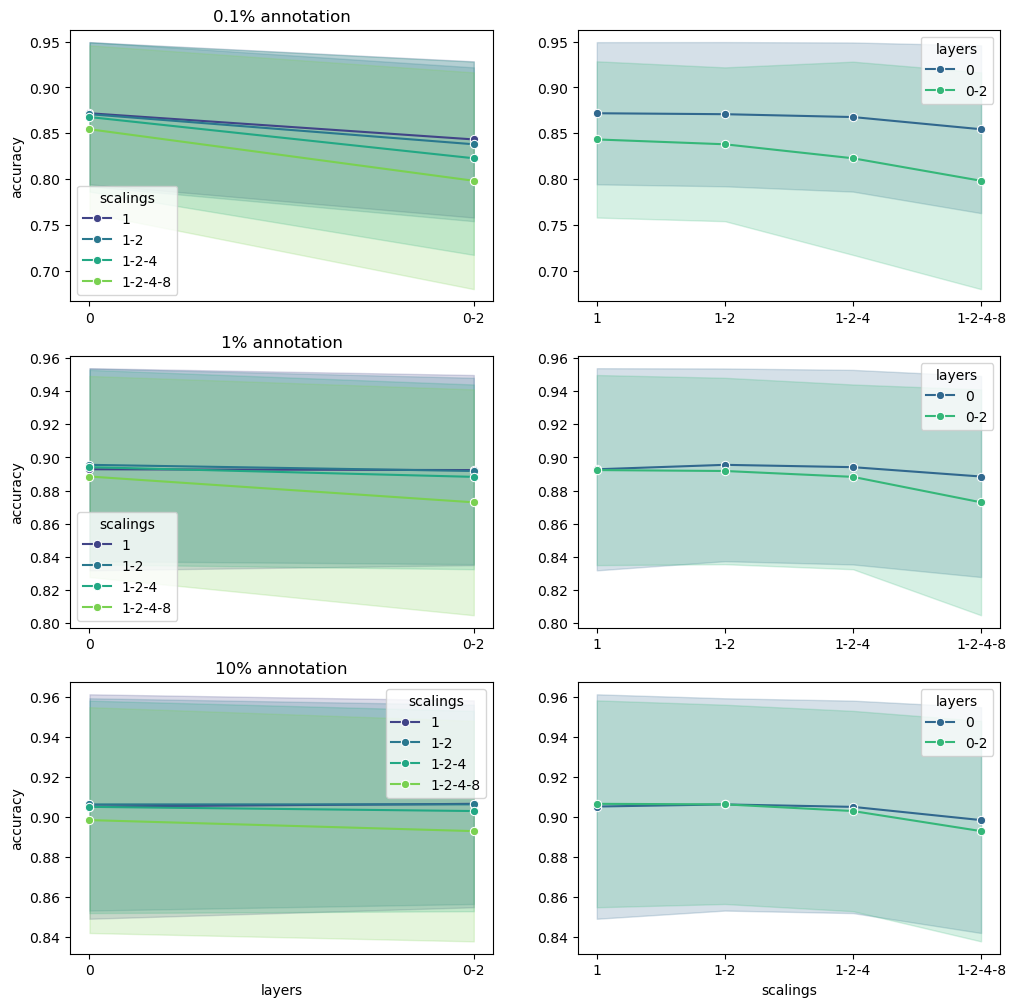

In [16]:
title_list = [0.1, 1, 10]
df_list = [df001, df010, df100]
num_df = len(df_list)

fig, ax = plt.subplots(3, 2)

fig.set_size_inches(12, 12)
fig.set_dpi(100)

for i, df in enumerate(df_list):
    row = ax[i]
    sns.lineplot(x='layers', y='accuracy', data=df, hue='scalings', palette='viridis', errorbar='sd', marker='o',ax=row[0])
    sns.lineplot(x='scalings', y='accuracy', data=df, hue='layers', palette='viridis', errorbar='sd', marker='o',ax=row[1])
    # Hide y axis label of right plot
    row[0].title.set_text(f"{title_list[i]}% annotation")
    row[1].set_ylabel('')
    if i != num_df-1:
        row[0].set_xlabel('')
        row[1].set_xlabel('')

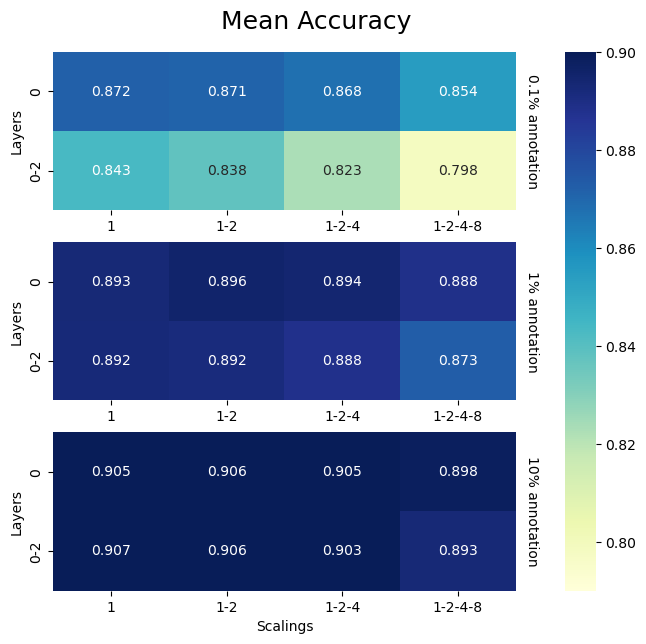

In [144]:
# Create a heatmap with layers and scalings
title_list = [0.1, 1, 10]
df_list = [df001, df010, df100]
num_df = len(df_list)
# fig, ax = plt.subplots(3, 1, gridspec_kw={'width_ratios': [15], 'height_ratios': [1, 0.15, 1]})
fig, ax = plt.subplot_mosaic([['upper left', 'right'],
                              ['mid left', 'right'],
                              ['lower left', 'right']],
                              gridspec_kw={'width_ratios': [15, 1]})
ax_list = [ax['upper left'], ax['mid left'], ax['lower left']]
fig.set_size_inches(7, 7)
fig.set_dpi(100)
fig.suptitle('Mean Accuracy', fontsize=18, y=0.94)
# fig.tight_layout()

for i, df in enumerate(df_list):
    row = ax_list[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values='accuracy')

    sns.heatmap(heatmap_df_mean, annot=True, cmap="YlGnBu", fmt=".3f", cbar=i==0, cbar_ax=ax['right'], ax=row, vmin=0.79, vmax=0.9)
    # row.set_title(f'{["0.1", "1.0"][i]}% annotation')
    row.text(1.02, 0.5, f'{title_list[i]}% annotation', transform=row.transAxes, rotation=270, va='center')
    row.set_xlabel('Scalings' if i == num_df - 1 else '')
    row.set_ylabel('Layers')

    # row.set_tight_layout()
    # row.set_aspect('auto')

# plt.savefig('results/avg_acc.pdf', dpi=300)



### Compare Ilastik results on the same set of data

In [156]:
pred04_010 = df_orig.loc[(df_orig['scribbles bin'] == 1) & (df_orig['img_num'].isin(range(0, 540, 10)))]
pred04_001 = df_orig[(df_orig['scribbles bin'] == 0.1) & (df_orig['img_num'].isin(range(0, 540, 10)))]
# pred04_001 = df_orig[(df_orig['scribbles bin'] == 0.01) & (df_orig['img_num'].isin(range(0, 540, 10)))]

# Prove that the two test runs (pred04 with all images but only default convpaint and pred05/df010 with convpaint comparison) gave the same results
print(f"pred04 {pred04_010[pred04_010['prediction type'] == 'convpaint']['accuracy'].mean():.3f} = pred05 {df010[df010['prediction type']=='convpaint_l-0_s-1-2']['accuracy'].mean():.3f}")
print(f"pred04 {pred04_001[pred04_001['prediction type'] == 'convpaint']['accuracy'].mean():.3f} = pred05 {df001[df001['prediction type']=='convpaint_l-0_s-1-2']['accuracy'].mean():.3f}")

pred04 0.896 = pred05 0.896
pred04 0.871 = pred05 0.871


In [158]:
# Extract Ilastik results for the equivalent cases
ilastik_010 = pred04_010[pred04_010['prediction type']=='ilastik']
ilastik_001 = pred04_001[pred04_001['prediction type']=='ilastik']
ilastik_100 =  pd.read_csv("results/pred07_240408151643.csv")
print(f"Ilastik mean accuracy for 0.1% scribbles and every 10th image: {ilastik_001['accuracy'].mean():.3f}")
print(f"Ilastik mean accuracy for 1% scribbles and every 10th image: {ilastik_010['accuracy'].mean():.3f}")
print(f"Ilastik mean accuracy for 10% scribbles and every 10th image: {ilastik_100['accuracy'].mean():.3f}")
# Do the same for Convpaint to ensure that the results are the same
# convpaint_001 = pred04_001[pred04_001['prediction type']=='convpaint']
# convpaint_010 = pred04_010[pred04_010['prediction type']=='convpaint']
# convpaint_100 =  pd.read_csv("results/pred06_240403221657.csv")
# print(f"ConvPaint mean accuracy for 0.1% scribbles and every 10th image: {convpaint_001['accuracy'].mean():.3f}")
# print(f"ConvPaint mean accuracy for 1% scribbles and every 10th image: {convpaint_010['accuracy'].mean():.3f}")
# print(f"ConvPaint mean accuracy for 10% scribbles and every 10th image: {df100['accuracy'].mean():.3f}")

Ilastik mean accuracy for 0.1% scribbles and every 10th image: 0.878
Ilastik mean accuracy for 1% scribbles and every 10th image: 0.904
Ilastik mean accuracy for 10% scribbles and every 10th image: 0.911


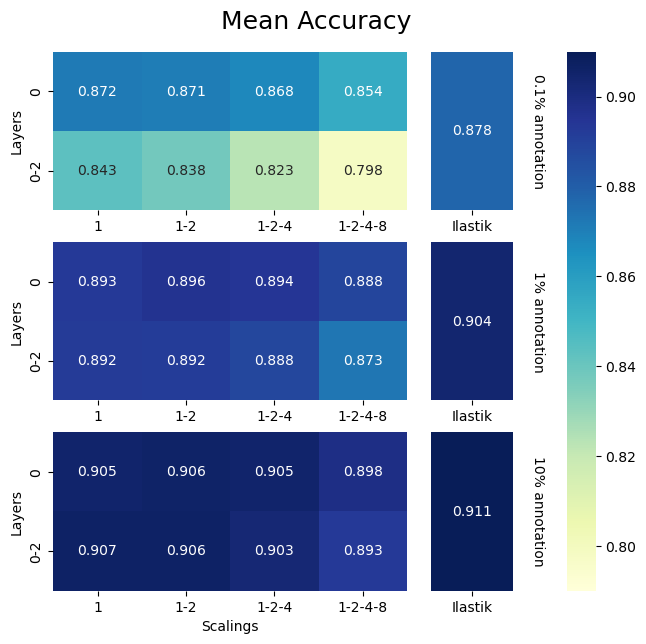

In [160]:
# Create a heatmap with layers and scalings
title_list = [0.1, 1, 10]
fig, ax = plt.subplot_mosaic([['upper left', 'upper mid', 'pad', 'right'],
                              ['mid left', 'mid mid', 'pad', 'right'],
                              ['lower left', 'lower mid', 'pad', 'right']],
                              gridspec_kw={'width_ratios': [15, 3.5, 0.3, 1.2]})
ax['pad'].axis('off')
fig.set_size_inches(7, 7)
fig.set_dpi(100)
fig.suptitle('Mean Accuracy', fontsize=18, y=0.94)
heatmap_cfg = {"annot":True, "cmap":"YlGnBu", "fmt":".3f", "cbar_ax":ax['right'], "vmin":0.79, "vmax":0.91}
# fig.tight_layout()

# CONVPAINT
df_list = [df001, df010, df100]
num_df = len(df_list)
ax_list = [ax['upper left'], ax['mid left'], ax['lower left']]
for i, df in enumerate(df_list):
    row = ax_list[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values='accuracy')

    sns.heatmap(heatmap_df_mean, cbar=i==0, ax=row, **heatmap_cfg)
    # row.set_title(f'{["0.1", "1.0"][i]}% annotation')
    row.set_xlabel('Scalings' if i == num_df - 1 else '')
    row.set_ylabel('Layers')

    # row.set_tight_layout()
    # row.set_aspect('auto')

# ILASTIK
df_list_ila = [ilastik_001, ilastik_010, ilastik_100]
ax_list_ila = [ax['upper mid'], ax['mid mid'], ax['lower mid']]
for i, df in enumerate(df_list_ila):
    row = ax_list_ila[i]
    # Create a pivot table for heatmap, but only use the one value given for Ilastik
    heatmap_df_mean = df['accuracy'].mean().reshape((1,1))
    sns.heatmap(heatmap_df_mean, cbar=False, ax=row, **heatmap_cfg)
    row.set_xticklabels(["Ilastik"])
    row.set_yticks([])
    row.text(1.22, 0.5, f'{title_list[i]}% annotation', transform=row.transAxes, rotation=270, va='center')

# plt.savefig('results/pred07_avg_acc.pdf', dpi=300)

In [120]:
def print_me(**kwargs):
    for kw in kwargs:
        print(kw, kwargs[kw])
print_me(**heatmap_cfg)

cbar_ax Axes(0.859565,0.11;0.0404348x0.77)
ax Axes(0.125,0.11;0.505435x0.226471)
vmin 0.79
vmax 0.91
